<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/rg_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

# **Regresión**


# ***Arbol de Regresión***

***Supóngase que el departamento de ventas de una empresa quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas.***


## **Bibliotecas**

### **Instalando bibliotecas**

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Análisis de datos**

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt

### **Gráficos**

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

### **Preprocesado y modelado**

#### **Con Scikit-learn**

In [ ]:
import sklearn 
import sklearn.metrics as metrics 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## **Conjunto de Datos**

In [ ]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/publicidad_multiple.csv"

## ***Dataframe***

In [ ]:
datos = pd.read_csv(url, index_col = 0)

In [ ]:
datos.head(10)

,ventas,radio,tv,periodico
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## **Relación entre variables**

***El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.***

In [ ]:
corr_matrix = round(datos.corr(),3)

### **Matriz de correlaciones**

In [ ]:
px.imshow(corr_matrix,
          title = "Matriz de correlacion",
          text_auto = True, 
          template = "gridon",
          labels={"color":"Coeficiente"})

### **Gráfico de distribución para cada variable numérica**

In [ ]:
datos.columns

Index(['ventas', 'radio', 'tv', 'periodico'], dtype='object')

In [ ]:
datos.columns[1:4]

Index(['radio', 'tv', 'periodico'], dtype='object')

In [ ]:
for i in datos.columns[1:4]:
  fig = px.scatter(datos, 
                   x = i,
                   y = datos.ventas,
                   template = "gridon",
                   title = i)
  
  fig.show()

## ***Ajuste del modelo***

**Se ajusta un modelo lineal múltiple con el objetivo de predecir las ventas en función de la inversión en los tres canales de publicidad.**


### **División de los datos en train y test**

In [ ]:
X = datos[["radio","tv","periodico"]]
y = datos[["ventas"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 12345)

### **Creación del modelo**

In [ ]:
modelo = DecisionTreeRegressor(max_depth=3, random_state=0)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
modelo

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
modelo.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

#### ***Información del modelo***

In [ ]:
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Coeficiente de determinación R^2: 0.7818883644643493


### **Predicción**

In [ ]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

[253.48823529 132.99230769  62.77058824]


In [ ]:
X_test["Ventas"] = y_test
X_test["Prediccion"] = predicciones
X_test.head(9)

,radio,tv,periodico,Ventas,Prediccion
52,41.7,39.6,22.6,216.4,253.488235
157,1.3,24.3,10.1,149.8,132.992308
135,47.0,8.5,11.6,48.3,62.770588
140,17.0,12.9,10.9,73.4,62.770588
56,28.1,41.4,5.5,7.3,15.830769
95,31.6,52.9,16.9,163.3,162.046667
54,28.8,15.9,20.2,262.7,253.488235
50,3.1,34.6,11.4,199.8,132.992308
17,39.6,55.8,24.4,281.4,253.488235


### **Evaluacion del modelo**

#### **Error de la media de los cuadrados - MSE**

In [ ]:
round(sqrt(mean_squared_error(y_test, predicciones)),3)

46.699

#### **Error de la media absoluta - MAE**


In [ ]:
round(metrics.median_absolute_error(y_test, predicciones),3)

21.172

#### **Coeficiente de determinación ($R^2$)**


In [ ]:
round(metrics.r2_score(y_test, predicciones),3)

0.757

## **Graficando el modelo**

In [ ]:
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

Profundidad del árbol: 3
Número de nodos terminales: 8


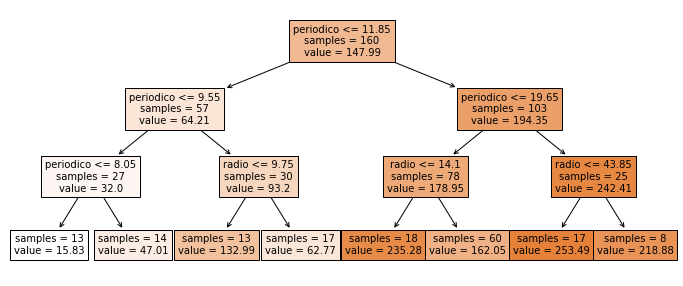

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

plot = plot_tree(
            decision_tree = modelo,
            feature_names = datos.drop(columns = "ventas").columns,
            class_names   = 'ventas',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax)

## **Importancia de predictores**

**La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el mse, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.**

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.866105
0,radio,0.133895
1,tv,0.000000
